In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("titanic_csv.csv")  

# columns are dropped which are not in use 
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

# missing value is filled with mean 
age_imputer = SimpleImputer(strategy="mean")
df["Age"] = age_imputer.fit_transform(df[["Age"]]).ravel()

embarked_imputer = SimpleImputer(strategy="most_frequent")
df["Embarked"] = embarked_imputer.fit_transform(df[["Embarked"]]).ravel()

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# one-hot encoding used 
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

print(df.head())
print("✅ Preprocessing Done - Shape:", df.shape)


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True
✅ Preprocessing Done - Shape: (891, 9)


In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("synthetic_customer_data.csv")  

# null values checked 
print("Nulls Before:\n", df.isnull().sum())

# filling numerical values with mean 
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy="mean")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# feeling categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# binary categorical columns
label_encodable = [col for col in cat_cols if df[col].nunique() == 2]
le = LabelEncoder()
for col in label_encodable:
    df[col] = le.fit_transform(df[col])

# one hot encoding used 
df = pd.get_dummies(df, columns=[col for col in cat_cols if col not in label_encodable], drop_first=True)
print(df.head())
print("✅ Preprocessing Done - Shape:", df.shape)


Nulls Before:
 customer_id               0
name                      0
age                       0
gender                    0
country                   0
state                     0
city                      0
email_opt_in              0
signup_date               0
last_login                0
total_logins              0
membership_level          0
purchase_amount           0
avg_purchase_value        0
num_orders                0
days_since_last_order     0
mobile_user               0
browser_type              0
referral_source           0
feedback_score            0
is_active                 0
has_discount_applied      0
satisfaction_level        0
support_tickets           0
churned                   0
credit_score              0
job_title                 0
annual_income             0
marital_status            0
has_kids                  0
num_kids                  0
home_owner                0
loan_accounts             0
preferred_device          0
subscription_type         0
disco

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

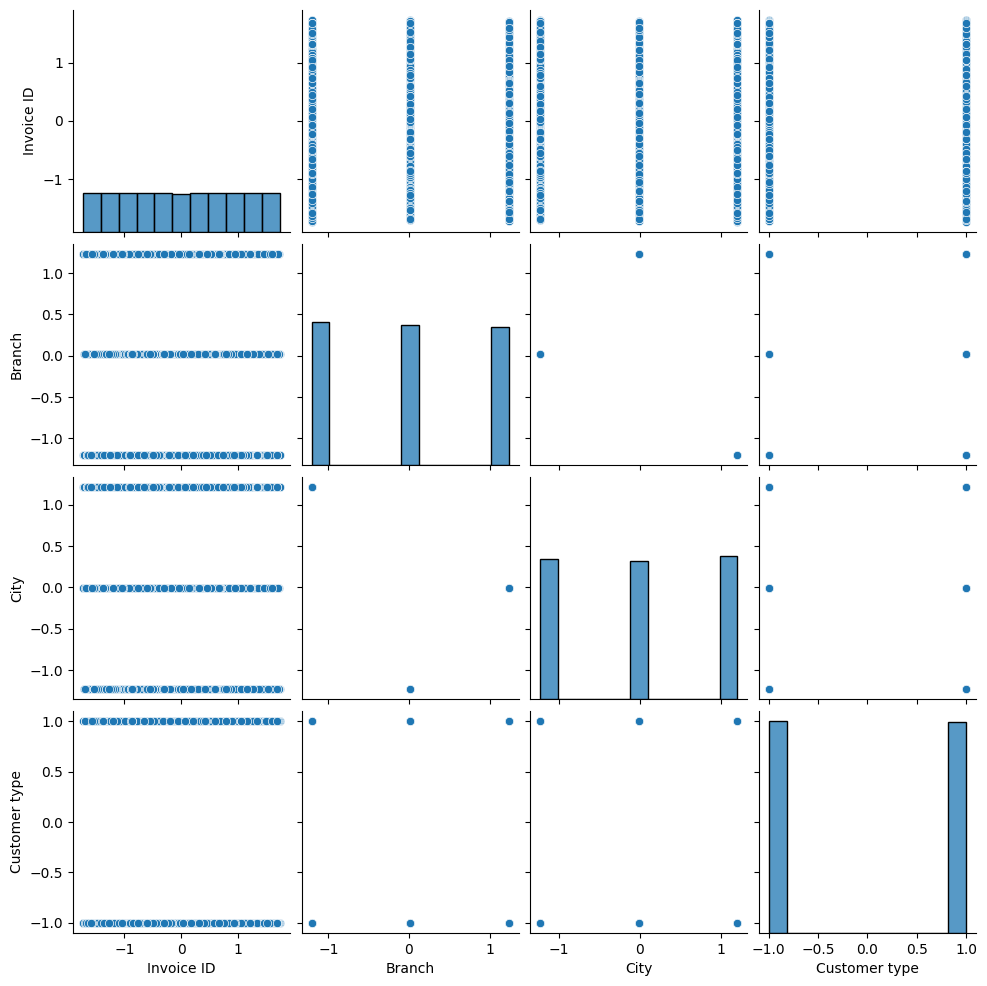

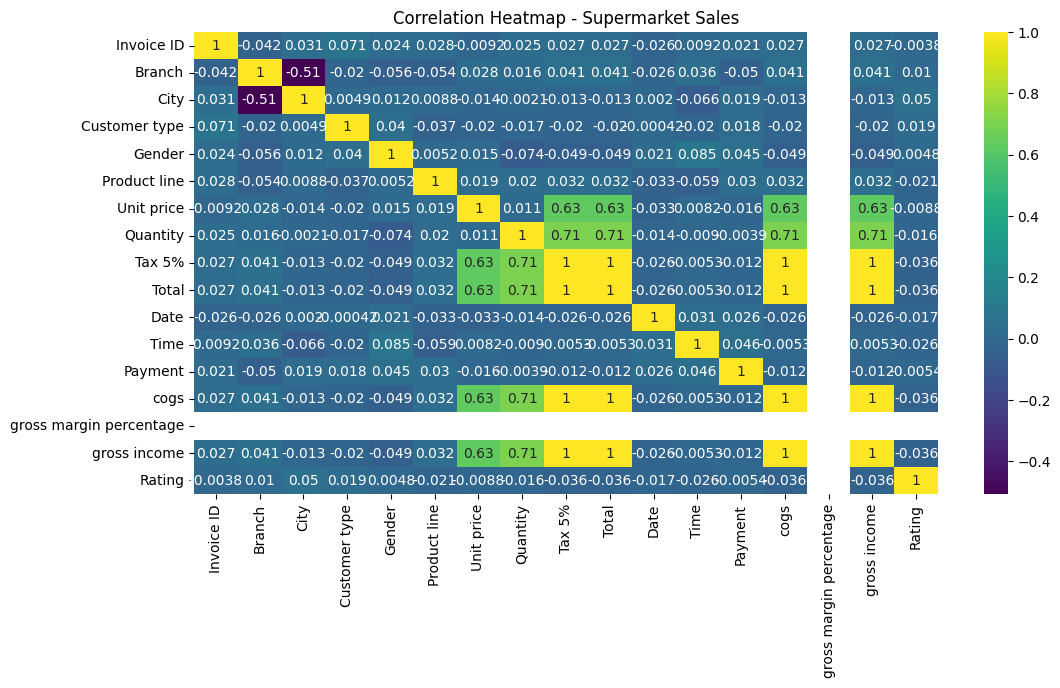

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
supermarket_df = pd.read_csv("supermarket_salescsv.csv")

print(supermarket_df.info())
print(supermarket_df.describe(include='all'))

# Missing Values 
print(supermarket_df.isnull().sum())

# Encode Categorical used 
le = LabelEncoder()
for col in supermarket_df.select_dtypes(include='object').columns:
    supermarket_df[col] = le.fit_transform(supermarket_df[col].astype(str))

# Standard Scaling of Numerical Columns is used 
scaler = StandardScaler()
for col in supermarket_df.select_dtypes(include=['int64', 'float64']).columns:
    supermarket_df[col] = scaler.fit_transform(supermarket_df[[col]])


sns.pairplot(supermarket_df.iloc[:, :4])  
plt.show()

#  Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(supermarket_df.corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap - Supermarket Sales")
plt.show()
